## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Added this because my linregress would not run
from scipy.stats import linregress

# Just in case
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
mouse_metadata.head(3)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15


In [3]:
study_results.head(3)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0


In [4]:
# Combine the data into a single dataset
combined_mouse_df = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")

# Display the data table for preview
combined_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of total mice data.
combined_mouse_df["Mouse ID"].count()

1893

In [6]:
# Checking the number of unique mice.
number_of_mice = combined_mouse_df["Mouse ID"].value_counts()
number_of_mice

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_mouse_df.loc[combined_mouse_df.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = combined_mouse_df.loc[(combined_mouse_df["Mouse ID"] == "g989")]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_mouse_df.loc[(combined_mouse_df["Mouse ID"] != "g989")]

In [10]:
# Checking the number of mice in the clean DataFrame.
cleaned_df["Mouse ID"].value_counts()

k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [11]:
cleaned_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor 
# volume for each regimen
regimen_df = cleaned_df.groupby("Drug Regimen")
mean_tumor = regimen_df["Tumor Volume (mm3)"].mean().round(3)
median_tumor = regimen_df["Tumor Volume (mm3)"].median().round(3)
var_tumor = regimen_df["Tumor Volume (mm3)"].var().round(3)
std_tumor = regimen_df["Tumor Volume (mm3)"].std().round(3)
sem_tumor = regimen_df["Tumor Volume (mm3)"].sem(ddof = 0).round(3)

# Summary stats table
summary_stat_df = {"Mean": mean_tumor,
                     "Median": median_tumor,
                     "Variance": var_tumor,
                     "Standard Deviation": std_tumor,
                     "SEM": sem_tumor}
summary_stat_df = pd.DataFrame(summary_stat_df)
summary_stat_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.468
Infubinol,52.885,51.821,43.129,6.567,0.491
Ketapril,55.236,53.699,68.554,8.280,0.602
Naftisol,54.332,52.509,66.173,8.135,0.595
Placebo,54.034,52.289,61.168,7.821,0.580
Propriva,52.321,50.446,43.852,6.622,0.542
Ramicane,40.217,40.673,23.487,4.846,0.320
Stelasyn,54.233,52.432,59.451,7.710,0.572


In [13]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_groupby = cleaned_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"].round(3)
median_groupby = cleaned_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"].round(3)
var_groupby = cleaned_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"].round(3)
std_groupby = cleaned_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"].round(3)
sem_groupby = cleaned_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"].round(3)

In [14]:
# Assemble the resulting series into a single summary dataframe.
summary_groupby_df =  pd.DataFrame({"Mean": mean_groupby,
                     "Median": median_groupby,
                     "Variance": var_groupby,
                     "Standard Deviation": std_groupby,
                     "SEM": sem_groupby})
summary_groupby_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg_df = cleaned_df.groupby(cleaned_df["Drug Regimen"])["Tumor Volume (mm3)"].agg([
    "mean", "median", "var", "std", "sem"]).round(3)
summary_agg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

In [16]:
# Figure out number of each drug used
drug_total = pd.DataFrame(pd.value_counts(cleaned_df["Drug Regimen"]))
drug_total

,Drug Regimen
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Infubinol,178
Ceftamin,178
Propriva,148


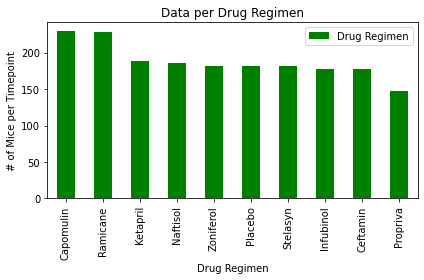

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_total.plot(kind = "bar", color = "green", align = "center")
plt.title("Data per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice per Timepoint")
plt.tight_layout()
plt.show()

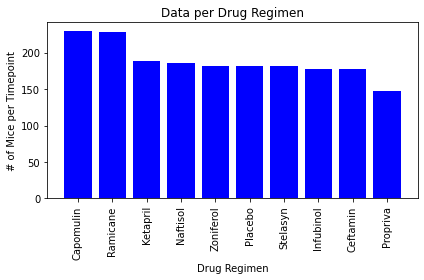

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Infubinol", 
        "Ceftamin", "Propriva"]
drug_count = [230, 228, 188, 186, 182, 181, 181, 178, 178, 148]
x_axis = np.arange(len(drug))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
plt.bar(x_axis, drug_count, color = "blue", align = "center")
plt.xticks(tick_locations, drug, rotation = "vertical")
plt.title("Data per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice per Timepoint")
plt.tight_layout()
plt.show()


In [19]:
# Find out how many males/females in total
gender = cleaned_df["Sex"].value_counts()
gender

Male      958
Female    922
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

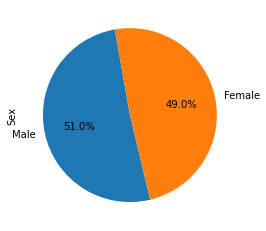

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_pandas = gender.plot(kind = "pie", ylabel = "Sex", autopct = "%1.1f%%", startangle = 100)
gender_pandas

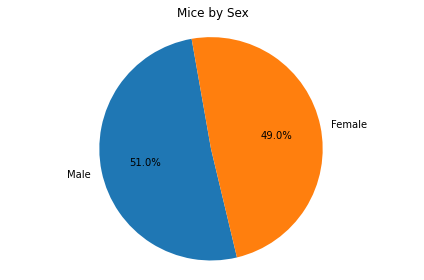

In [21]:
# Labels for pie chart
labels = cleaned_df["Sex"].unique()
# Values for each section
sex = cleaned_df["Sex"].value_counts()
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex, labels = labels, autopct = "%1.1f%%", startangle = 100)
plt.title("Mice by Sex")
plt.axis("equal")
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_df = pd.DataFrame(combined_mouse_df.groupby("Mouse ID")["Timepoint"].max().sort_values()).reset_index().rename(columns = {"Timepoint": "Greatest Timepoint"})
greatest_timepoint_df.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(combined_mouse_df, greatest_timepoint_df, on = "Mouse ID")
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Greatest Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [34]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
drug_info = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    temp_df = merged_df.loc[merged_df["Drug Regimen"] == drug]
   
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_volume_df = temp_df.loc[temp_df["Timepoint"] == temp_df["Greatest Timepoint"]]

    # add subset 
    values = final_volume_df["Tumor Volume (mm3)"]
    drug_info.append(values)
    
    # Determine outliers using upper and lower bounds
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"IQR for {drug}: {iqr}")
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    print(f"Lower Bound for {drug}: {lower_bound}")
    print(f"Upper Bound for {drug}: {upper_bound}")
    outlier_count = (values.loc[(final_volume_df["Tumor Volume (mm3)"] >= upper_bound) | 
                                        (final_volume_df["Tumor Volume (mm3)"] <= lower_bound)]).count()
    print(f"Number of {drug} outliers: {outlier_count}")

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


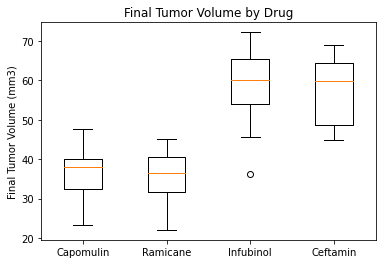

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(drug_info)
plt.title("Final Tumor Volume by Drug")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Get Mouse ID's for Capomulin
cap_mouse = combined_mouse_df.loc[combined_mouse_df["Drug Regimen"] == "Capomulin"]
cap_mouse["Mouse ID"].value_counts()

s185    10
x401    10
i557    10
r944    10
l509    10
s710    10
g316    10
v923    10
j119    10
b128    10
b742    10
l897    10
g288    10
w914    10
i738    10
t565    10
m957    10
r554    10
y793    10
u364    10
m601    10
j246     8
f966     5
r157     4
w150     3
Name: Mouse ID, dtype: int64

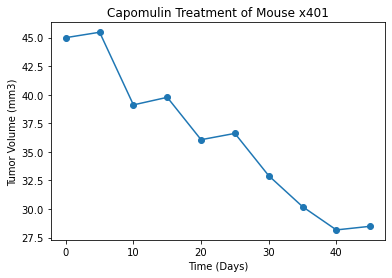

In [26]:
# I picked mouse x401
mouse_s185 = combined_mouse_df.loc[combined_mouse_df["Mouse ID"] == "x401"]
plt.plot(mouse_s185['Timepoint'], mouse_s185['Tumor Volume (mm3)'], marker = 'o')
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse x401")
plt.show()

In [27]:
# Get only Capomulin Regimen
capomulin_df = combined_mouse_df.loc[combined_mouse_df["Drug Regimen"] == "Capomulin"]
capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [28]:
# Finding average volume of Capomulin
avg_vol_df = pd.DataFrame(capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().sort_values()).reset_index().rename(columns = {"Tumor Volume (mm3)": "Average Tumor Volume"})
avg_vol_df.head()

,Mouse ID,Average Tumor Volume
0,s185,34.559143
1,m601,34.847470
2,x401,36.182040
3,f966,36.505973
4,r554,36.509212


In [29]:
# Merging the two above datasets and extracting Volume and Weight
# Also dropping duplicates just in case
avg_vol_merged_df = pd.merge(capomulin_df, avg_vol_df, on = "Mouse ID")
avg_vol_merged_df
final_volume_df = avg_vol_merged_df[["Average Tumor Volume","Weight (g)"]].drop_duplicates()
final_volume_df.head()

,Average Tumor Volume,Weight (g)
0,34.559143,17
10,36.182040,15
20,34.847470,17
30,36.505973,17
35,39.887495,17


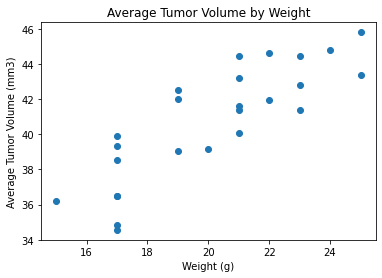

In [30]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
x_values = final_volume_df['Weight (g)']
y_values = final_volume_df['Average Tumor Volume']
plt.scatter(x_values,y_values)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()

## Correlation and Regression

The correlation between weight and average tumor volume on the Capomulin regimen is 0.84.


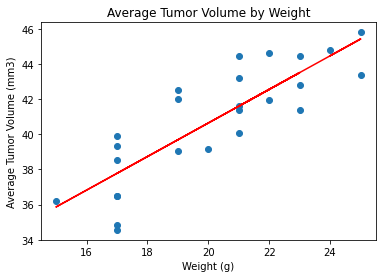

In [31]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between weight and average tumor volume on the Capomulin regimen is {round(correlation[0],2)}.")

# Calculate Linear Regression
x_values = final_volume_df["Weight (g)"]
y_values = final_volume_df["Average Tumor Volume"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.annotate(line_eq,(10,20), fontsize = 20, color = "red") # This is not showing up on my scatterplot
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Weight")
plt.show()